In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from sklearn.utils import shuffle

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/chembureast/chembur_east.csv


In [2]:
tf.random.set_seed(10)
np.random.seed(10)

In [3]:
dataFrame = pd.read_csv('/kaggle/input/chembureast/chembur_east.csv')

In [4]:
dataFrame

LOCALITY  S_D  S_M  MALARIA  DENGUE  CHICKENGUNIA  \
CHEMBUR_EAST 1          1  0.0  0.0      0.0     0.0           0.0   
             2          1  0.0  0.0      0.0     0.0           0.0   
             3          1  0.0  0.0      0.0     0.0           0.0   
             4          1  0.0  0.0      0.0     0.0           0.0   
             5          1  0.0  0.0      0.0     0.0           0.0   
...                   ...  ...  ...      ...     ...           ...   
             27        12  0.0  0.0      0.0     0.0           0.0   
             28        12  0.0  0.0      0.0     0.0           0.0   
             29        12  0.0  0.0      0.0     0.0           0.0   
             30        12  0.0  0.0      0.0     0.0           0.0   
             31        12  0.0  0.0      0.0     0.0           0.0   

                 VIRAL_FEVER  FLU  TUBERCULOSIS  DIARROHEA  TYPHOID  CHOLERA  \
CHEMBUR_EAST 1           0.0  0.0           0.0        0.0      0.0    26.09   
             2           0.0  0.0           0.0        0.0      0.0    26.20   
             3           0.0  0.0           0.0        0.0      0.0    26.68   
             4           0.0  0.0           0.0        0.0      0.0    27.84   
             5           0.0  0.0           0.0        0.0      0.0    29.06   
...                      ...  ...           ...        ...      ...      ...   
             27          0.0  1.0           1.0        1.0      1.0    28.36   
             28          0.0  1.0           1.0        1.0      1.0    29.33   
             29          0.0  1.0           1.0        1.0      1.0    31.07   
             30          0.0  1.0           1.0        1.0      1.0    30.43   
             31          0.0  1.0           1.0        1.0      1.0    30.60   

                 JAUNDICE      TEMP_C  RAIN_MM  AQI  \
CHEMBUR_EAST 1        0.0  159.500000      0.0  0.0   
             2        0.0  150.566667      0.0  0.0   
             3        0.0  152.066667      0.0  0.0   
             4        0.0  124.200000      0.0  0.0   
             5        0.0   94.230000      0.0  0.0   
...                   ...         ...      ...  ...   
             27       0.0  157.833333      3.0  4.0   
             28       0.0  136.800000      3.0  4.0   
             29       0.0  151.700000      3.0  4.0   
             30       0.0  163.720000      3.0  4.0   
             31       0.0  162.133333      3.0  4.0   

                 TROMBAY_DI.TROMBAY_TY.TROMBAY_CHO  TROMBAY_J  
CHEMBUR_EAST 1                                 0.0        0.0  
             2                                 0.0        0.0  
             3                                 0.0        0.0  
             4                                 0.0        0.0  
             5                                 0.0        0.0  
...                                            ...        ...  
             27                                5.0        4.0  
             28                                5.0        4.0  
             29                                5.0        4.0  
             30                                5.0        4.0  
             31                                5.0        4.0  

[365 rows x 18 columns]

In [5]:
X_axis = dataFrame[['S_D', 'S_M', 'TEMP_C', 'RAIN_MM', 'AQI', 'TROMBAY_DI.TROMBAY_TY.TROMBAY_CHO', 'TROMBAY_J']]
Y_axis = dataFrame[['MALARIA', 'DENGUE', 'CHICKENGUNIA', 'VIRAL_FEVER', 'FLU', 'TUBERCULOSIS', 'DIARROHEA', 'JAUNDICE']]
X_axis

S_D  S_M      TEMP_C  RAIN_MM  AQI  \
CHEMBUR_EAST 1   0.0  0.0  159.500000      0.0  0.0   
             2   0.0  0.0  150.566667      0.0  0.0   
             3   0.0  0.0  152.066667      0.0  0.0   
             4   0.0  0.0  124.200000      0.0  0.0   
             5   0.0  0.0   94.230000      0.0  0.0   
...              ...  ...         ...      ...  ...   
             27  0.0  0.0  157.833333      3.0  4.0   
             28  0.0  0.0  136.800000      3.0  4.0   
             29  0.0  0.0  151.700000      3.0  4.0   
             30  0.0  0.0  163.720000      3.0  4.0   
             31  0.0  0.0  162.133333      3.0  4.0   

                 TROMBAY_DI.TROMBAY_TY.TROMBAY_CHO  TROMBAY_J  
CHEMBUR_EAST 1                                 0.0        0.0  
             2                                 0.0        0.0  
             3                                 0.0        0.0  
             4                                 0.0        0.0  
             5                                 0.0        0.0  
...                                            ...        ...  
             27                                5.0        4.0  
             28                                5.0        4.0  
             29                                5.0        4.0  
             30                                5.0        4.0  
             31                                5.0        4.0  

[365 rows x 7 columns]

In [6]:
Y_axis

MALARIA  DENGUE  CHICKENGUNIA  VIRAL_FEVER  FLU  \
CHEMBUR_EAST 1       0.0     0.0           0.0          0.0  0.0   
             2       0.0     0.0           0.0          0.0  0.0   
             3       0.0     0.0           0.0          0.0  0.0   
             4       0.0     0.0           0.0          0.0  0.0   
             5       0.0     0.0           0.0          0.0  0.0   
...                  ...     ...           ...          ...  ...   
             27      0.0     0.0           0.0          0.0  1.0   
             28      0.0     0.0           0.0          0.0  1.0   
             29      0.0     0.0           0.0          0.0  1.0   
             30      0.0     0.0           0.0          0.0  1.0   
             31      0.0     0.0           0.0          0.0  1.0   

                 TUBERCULOSIS  DIARROHEA  JAUNDICE  
CHEMBUR_EAST 1            0.0        0.0       0.0  
             2            0.0        0.0       0.0  
             3            0.0        0.0       0.0  
             4            0.0        0.0       0.0  
             5            0.0        0.0       0.0  
...                       ...        ...       ...  
             27           1.0        1.0       0.0  
             28           1.0        1.0       0.0  
             29           1.0        1.0       0.0  
             30           1.0        1.0       0.0  
             31           1.0        1.0       0.0  

[365 rows x 8 columns]

In [7]:
X_axis = X_axis.astype(float)
Y_axis = Y_axis.astype(float)
X_axis, Y_axis = shuffle(X_axis, Y_axis)
X_axis
X_axis.shape[0] #365
X_axis.shape[1] #13

7

In [8]:
X_train = (X_axis.to_numpy()[:300]).reshape(300, 1, X_axis.shape[1]) #3D matrix 290 arrays each with 1 array each with 13 cols
print(X_train.shape)
Y_train = (Y_axis.to_numpy()[:300])
print(Y_train.shape)

(300, 1, 7)
(300, 8)


In [9]:
X_val = (X_axis.to_numpy()[300:335]).reshape(35, 1, X_axis.shape[1]) #3D matrix 45 arrays each with 1 array each with 19 cols
print(X_val.shape)
Y_val = (Y_axis.to_numpy()[300:335])
print(Y_val.shape)

(35, 1, 7)
(35, 8)


In [10]:
X_test = (X_axis.to_numpy()[335:]).reshape(X_axis.to_numpy()[335:].shape[0], 1, X_axis.shape[1])
print(X_test.shape)
Y_test = (Y_axis.to_numpy()[335:])
print(Y_test.shape)

(30, 1, 7)
(30, 8)


In [11]:
modelname = './chembureast/chembur_east.cpkt'
modelpath = modelname
modeldir = os.path.dirname(modelpath)
callback = tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, save_weights_only=True)

In [12]:
model = keras.Sequential()

#input_shape = ()
#model.add(layers.Embedding(input_shape=input_shape))
#model.add(Dropout(0.1))

#model.add(layers.LSTM(20, return_sequences=True))
#model.add(layers.LSTM(20, return_sequences=True))
#model.add(layers.LSTM(20))
#model.add(layers.Dense(8))

model.add(layers.GRU(20, return_sequences=True))
model.add(layers.GRU(20, return_sequences=True))
model.add(layers.GRU(20))
model.add(layers.Dense(8))

#model.summary()

In [13]:
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=150, callbacks=[callback])

Epoch 1/150
10/10 [==============================] - 5s 99ms/step - loss: 9.9062 - accuracy: 0.0517 - val_loss: 15.1572 - val_accuracy: 0.0571
Epoch 2/150
10/10 [==============================] - 0s 9ms/step - loss: 6.3031 - accuracy: 0.1153 - val_loss: 14.8554 - val_accuracy: 0.0571
Epoch 3/150
10/10 [==============================] - 0s 9ms/step - loss: 10.3007 - accuracy: 0.0764 - val_loss: 14.4898 - val_accuracy: 0.0571
Epoch 4/150
10/10 [==============================] - 0s 9ms/step - loss: 6.7799 - accuracy: 0.0697 - val_loss: 14.0732 - val_accuracy: 0.1714
Epoch 5/150
10/10 [==============================] - 0s 9ms/step - loss: 8.2378 - accuracy: 0.2819 - val_loss: 13.6386 - val_accuracy: 0.4286
Epoch 6/150
10/10 [==============================] - 0s 9ms/step - loss: 11.5207 - accuracy: 0.3477 - val_loss: 13.3259 - val_accuracy: 0.4286
Epoch 7/150
10/10 [==============================] - 0s 9ms/step - loss: 11.3182 - accuracy: 0.3669 - val_loss: 13.1342 - val_accuracy: 0.4286
Ep

In [14]:
validation_loss, validation_accuracy = model.evaluate(X_val, Y_val)
print("Validation loss: {0:.4f}, Validation accuracy: {1:.4}".format(validation_loss, validation_accuracy))
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Final loss: {0:.4f}, final accuracy: {1:.4}".format(test_loss, test_accuracy))

2/2 [==============================] - 0s 4ms/step - loss: 9.9990 - accuracy: 0.4286
Validation loss: 9.9990, Validation accuracy: 0.4286
1/1 [==============================] - 0s 17ms/step - loss: 12.2244 - accuracy: 0.3000
Final loss: 12.2244, final accuracy: 0.3


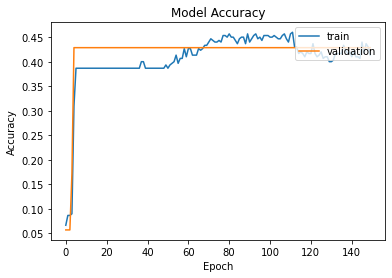

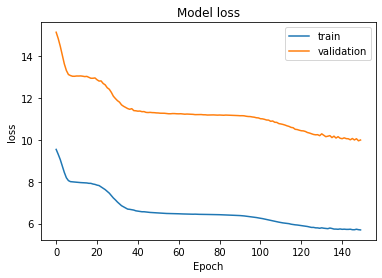

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend(loc='upper right')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()